In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import os
import torch
from tqdm import tqdm
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

# Add the parent directory to the Python path - bad practice, but it's just for the example
import sys
sys.path.append("..")

from src.glocal_analysis import run_analysis 
from src.datasets.flood_dataset import FloodDataset
from src.datasets.DLR_dataset import DatasetDLR
from src.plot_crp_explanations import plot_explanations, plot_one_image_explanation
from src.minio_client import MinIOClient
from LCRP.models import get_model 

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
device

'cpu'

In [5]:
model = get_model(model_name="unet", device=device, classes=1, ckpt_path="../models/model_s2burnt_modified.pt", in_channels=4, encoder_name="resnet50")

Loaded checkpoint ../models/model_s2burnt_modified.pt


In [6]:
!ls ../../DLR_data/dlr_germany/

S2A_MSIL2A_20210718T103031_R108_T31UGS_20210719T012705
S2A_MSIL2A_20210721T104031_R008_T31UGS_20210721T214914


## Load a test image into a DatasetDLR

In [39]:
dlr_sardinia_image1 = "../../DLR_data/dlr_sardinia/S2A_MSIL2A_20210814T102031_N0301_R065_T32TMK_20210814T132326.SAFE"
dlr_sardinia_image2 = "../../DLR_data/dlr_sardinia/S2B_MSIL2A_20210710T101559_N0301_R065_T32TMK_20210710T132321.SAFE"
dlr_sardinia_image3 = "../../DLR_data/dlr_sardinia/S2B_MSIL2A_20210730T101559_N0301_R065_T32TMK_20210730T135122.SAFE"

dlr_kuhmo_image1 = "../../DLR_data/dlr_kuhmo/Planned burn area - after burn"
dlr_kuhmo_image2 = "../../DLR_data/dlr_kuhmo/Planned burn area - before burn"

dlr_germany_image1 = "../../DLR_data/dlr_germany/S2A_MSIL2A_20210718T103031_R108_T31UGS_20210719T012705" 
dlr_germany_image2 = "../../DLR_data/dlr_germany/S2A_MSIL2A_20210721T104031_R008_T31UGS_20210721T214914"

In [8]:
img_dir = dlr_germany_image1

In [9]:
test_image_dataset = DatasetDLR(
    img_dir=img_dir,
    mask_dir=None,
    normalize_means_stds=[
        [0.1161, 0.1065, 0.1036, 0.2059],  # Means
        [0.0556, 0.0570, 0.0772, 0.1033]   # Stds
    ]
)

Loading images: 100%|██████████| 1/1 [00:00<00:00, 16.13it/s]


In [10]:
test_image_dataset.img_arr.shape

(48, 256, 256, 4)

In [11]:
reference_dataset = DatasetDLR(
    img_dir="../../DLR_data/fire_data/train_tiled/img", 
    mask_dir="../../DLR_data/fire_data/train_tiled/msk", 
    normalize_means_stds=[
        [0.1161, 0.1065, 0.1036, 0.2059],  # Means
        [0.0556, 0.0570, 0.0772, 0.1033]   # Stds
    ]
)

Loading masks: 100%|██████████| 731/731 [00:00<00:00, 5386.05it/s]


In [12]:
reference_dataset.img_arr.shape

(731, 256, 256, 4)

In [ ]:
# Setting up main parameters
model_name = "unet"
output_dir = "../output/crp/unet_fire_DLR"
class_id = 0
sample_id = 10
n_concepts = 3
n_refimgs = 12
layer = "encoder.layer3.0.conv1"
mode = "relevance"
prediction_num = 0

test_img, test_mask = test_image_dataset[sample_id]


fig = plot_one_image_explanation(model_name, model, test_img, reference_dataset, class_id, layer, prediction_num, mode, n_concepts, n_refimgs, output_dir=output_dir)

## Run analysis for all tiles of a given test image

Processing ../../DLR_data/dlr_germany/S2A_MSIL2A_20210721T104031_R008_T31UGS_20210721T214914


Loading images:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Concepts: torch.return_types.topk(
values=tensor([0.0082, 0.0081, 0.0071]),
indices=tensor([456, 179, 544]))
Computing reference images...
Plotting...


  2%|▏         | 1/48 [00:23<18:02, 23.03s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0093, 0.0090, 0.0085]),
indices=tensor([464, 456, 617]))
Computing reference images...
Plotting...


  4%|▍         | 2/48 [00:46<17:56, 23.40s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0086, 0.0074, 0.0070]),
indices=tensor([617, 464, 456]))
Computing reference images...
Plotting...


  6%|▋         | 3/48 [01:09<17:24, 23.22s/it]/Users/kortukov/miniconda3/envs/tema/lib/python3.8/site-packages/zennit/image.py:187: RuntimeWarning: invalid value encountered in divide
  array = (array - vmin) / (vmax - vmin)
/Users/kortukov/miniconda3/envs/tema/lib/python3.8/site-packages/zennit/image.py:188: RuntimeWarning: invalid value encountered in cast
  array = (array * 255).clip(0, 255).astype(np.uint8)


Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  8%|▊         | 4/48 [01:32<16:58, 23.15s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 10%|█         | 5/48 [01:55<16:31, 23.05s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0049, 0.0049, 0.0046]),
indices=tensor([  7, 461, 218]))
Computing reference images...
Plotting...


 12%|█▎        | 6/48 [02:18<16:06, 23.02s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0047, 0.0044, 0.0043]),
indices=tensor([  7, 461, 339]))
Computing reference images...
Plotting...


 15%|█▍        | 7/48 [02:41<15:40, 22.93s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0051, 0.0050, 0.0050]),
indices=tensor([461,   7, 477]))
Computing reference images...
Plotting...


 17%|█▋        | 8/48 [03:04<15:18, 22.96s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 19%|█▉        | 9/48 [03:27<14:52, 22.87s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 21%|██        | 10/48 [03:50<14:30, 22.91s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0068, 0.0064, 0.0062]),
indices=tensor([464,  62, 544]))
Computing reference images...
Plotting...


 23%|██▎       | 11/48 [04:12<14:05, 22.85s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0058, 0.0054, 0.0050]),
indices=tensor([646, 464, 355]))
Computing reference images...
Plotting...


 25%|██▌       | 12/48 [04:35<13:43, 22.87s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0105, 0.0094, 0.0082]),
indices=tensor([179, 544, 456]))
Computing reference images...
Plotting...


 27%|██▋       | 13/48 [04:58<13:21, 22.89s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0062, 0.0051, 0.0050]),
indices=tensor([646, 942, 912]))
Computing reference images...
Plotting...


 29%|██▉       | 14/48 [05:21<12:55, 22.82s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0075, 0.0073, 0.0071]),
indices=tensor([ 254, 1010,   62]))
Computing reference images...
Plotting...


 31%|███▏      | 15/48 [05:44<12:35, 22.90s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0079, 0.0077, 0.0072]),
indices=tensor([  62,  156, 1010]))
Computing reference images...
Plotting...


 33%|███▎      | 16/48 [06:07<12:11, 22.86s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 35%|███▌      | 17/48 [06:29<11:44, 22.73s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0072, 0.0064, 0.0060]),
indices=tensor([179, 544, 464]))
Computing reference images...
Plotting...


 38%|███▊      | 18/48 [06:52<11:23, 22.78s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0099, 0.0085, 0.0077]),
indices=tensor([179, 544, 456]))
Computing reference images...
Plotting...


 40%|███▉      | 19/48 [07:15<11:00, 22.78s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0058, 0.0054, 0.0054]),
indices=tensor([179, 456, 464]))
Computing reference images...
Plotting...


 42%|████▏     | 20/48 [07:38<10:38, 22.79s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 44%|████▍     | 21/48 [08:01<10:17, 22.88s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 46%|████▌     | 22/48 [08:23<09:53, 22.83s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0084, 0.0083, 0.0072]),
indices=tensor([544, 179,  62]))
Computing reference images...
Plotting...


 48%|████▊     | 23/48 [08:46<09:28, 22.75s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0097, 0.0080, 0.0077]),
indices=tensor([179, 236, 544]))
Computing reference images...
Plotting...


 50%|█████     | 24/48 [09:09<09:08, 22.84s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 52%|█████▏    | 25/48 [09:32<08:44, 22.82s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0065, 0.0063, 0.0062]),
indices=tensor([179, 544, 254]))
Computing reference images...
Plotting...


 54%|█████▍    | 26/48 [09:54<08:21, 22.81s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0092, 0.0088, 0.0085]),
indices=tensor([544, 156, 254]))
Computing reference images...
Plotting...


 56%|█████▋    | 27/48 [10:17<07:59, 22.84s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 58%|█████▊    | 28/48 [10:40<07:35, 22.78s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 60%|██████    | 29/48 [11:03<07:11, 22.74s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 62%|██████▎   | 30/48 [11:25<06:49, 22.73s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 65%|██████▍   | 31/48 [11:48<06:25, 22.68s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 67%|██████▋   | 32/48 [12:11<06:03, 22.70s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0065, 0.0059, 0.0058]),
indices=tensor([254, 544, 754]))
Computing reference images...
Plotting...


 69%|██████▉   | 33/48 [12:33<05:40, 22.71s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0061, 0.0058, 0.0055]),
indices=tensor([456, 646, 617]))
Computing reference images...
Plotting...


 71%|███████   | 34/48 [12:56<05:18, 22.72s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0101, 0.0092, 0.0083]),
indices=tensor([544, 179, 236]))
Computing reference images...
Plotting...


 73%|███████▎  | 35/48 [13:19<04:54, 22.69s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 75%|███████▌  | 36/48 [13:41<04:32, 22.67s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 77%|███████▋  | 37/48 [14:04<04:09, 22.70s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 79%|███████▉  | 38/48 [14:27<03:47, 22.72s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 81%|████████▏ | 39/48 [14:50<03:24, 22.68s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 83%|████████▎ | 40/48 [15:12<03:01, 22.67s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0074, 0.0068]),
indices=tensor([179, 544, 754]))
Computing reference images...
Plotting...


 85%|████████▌ | 41/48 [15:35<02:38, 22.67s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 88%|████████▊ | 42/48 [15:58<02:16, 22.72s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 90%|████████▉ | 43/48 [16:20<01:53, 22.67s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 92%|█████████▏| 44/48 [16:43<01:30, 22.65s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0101, 0.0101, 0.0096]),
indices=tensor([544, 179, 456]))
Computing reference images...
Plotting...


 94%|█████████▍| 45/48 [17:06<01:08, 22.67s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0123, 0.0089, 0.0080]),
indices=tensor([544, 179, 754]))
Computing reference images...
Plotting...


 96%|█████████▌| 46/48 [17:28<00:45, 22.62s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


 98%|█████████▊| 47/48 [17:51<00:22, 22.62s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


100%|██████████| 48/48 [18:13<00:00, 22.78s/it]


Processing ../../DLR_data/dlr_sardinia/S2A_MSIL2A_20210814T102031_N0301_R065_T32TMK_20210814T132326.SAFE


  0%|          | 0/3025 [00:00<?, ?it/s]

Concepts: torch.return_types.topk(
values=tensor([0.0084, 0.0076, 0.0065]),
indices=tensor([706, 140, 461]))
Computing reference images...
Plotting...


  0%|          | 1/3025 [00:22<19:06:28, 22.75s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0077, 0.0066]),
indices=tensor([706, 140, 461]))
Computing reference images...
Plotting...


  0%|          | 2/3025 [00:45<19:09:26, 22.81s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0077, 0.0066]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 3/3025 [01:08<19:07:24, 22.78s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0077, 0.0066]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 4/3025 [01:31<19:05:07, 22.74s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0077, 0.0066]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 5/3025 [01:53<19:02:57, 22.71s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0077, 0.0066]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 6/3025 [02:16<18:59:19, 22.64s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0077, 0.0066]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 7/3025 [02:38<18:59:51, 22.66s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0077, 0.0066]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 8/3025 [03:01<18:57:11, 22.62s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0078, 0.0067]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 9/3025 [03:24<18:58:47, 22.65s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0078, 0.0067]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 10/3025 [03:46<18:59:31, 22.68s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0079, 0.0068]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 11/3025 [04:09<19:01:48, 22.73s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0078, 0.0067]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 12/3025 [04:32<19:02:31, 22.75s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0078, 0.0067]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 13/3025 [04:55<19:00:42, 22.72s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0085, 0.0078, 0.0067]),
indices=tensor([706, 140, 531]))
Computing reference images...
Plotting...


  0%|          | 14/3025 [05:17<18:59:47, 22.71s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0082, 0.0074, 0.0064]),
indices=tensor([706, 140, 461]))
Computing reference images...
Plotting...


  0%|          | 15/3025 [05:40<18:57:25, 22.67s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0074, 0.0066, 0.0062]),
indices=tensor([706, 140, 461]))
Computing reference images...
Plotting...


  1%|          | 16/3025 [06:03<19:00:14, 22.74s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 17/3025 [06:26<19:09:38, 22.93s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 18/3025 [06:49<19:02:14, 22.79s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 19/3025 [07:11<18:56:34, 22.69s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 20/3025 [07:34<18:54:44, 22.66s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 21/3025 [07:57<19:00:46, 22.79s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 22/3025 [08:20<19:01:39, 22.81s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 23/3025 [08:42<18:58:30, 22.75s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0083, 0.0073, 0.0073]),
indices=tensor([ 115, 1003,  878]))
Computing reference images...
Plotting...


  1%|          | 24/3025 [09:05<18:55:17, 22.70s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0079, 0.0079, 0.0073]),
indices=tensor([254, 544, 236]))
Computing reference images...
Plotting...


  1%|          | 25/3025 [09:27<18:52:43, 22.65s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 26/3025 [09:50<18:48:25, 22.58s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 27/3025 [10:12<18:47:53, 22.57s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 28/3025 [10:36<19:01:54, 22.86s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 29/3025 [10:59<18:59:06, 22.81s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 30/3025 [11:22<19:05:32, 22.95s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 31/3025 [11:44<18:57:38, 22.80s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 32/3025 [12:07<18:59:04, 22.83s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 33/3025 [12:30<18:56:34, 22.79s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0037, 0.0036, 0.0035]),
indices=tensor([623, 389, 936]))
Computing reference images...
Plotting...


  1%|          | 34/3025 [12:53<18:58:30, 22.84s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 35/3025 [13:16<18:58:02, 22.84s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|          | 36/3025 [13:38<18:56:22, 22.81s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0122, 0.0108, 0.0104]),
indices=tensor([ 115,  878, 1003]))
Computing reference images...
Plotting...


  1%|          | 37/3025 [14:01<18:54:33, 22.78s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|▏         | 38/3025 [14:24<18:51:02, 22.72s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|▏         | 39/3025 [14:47<18:51:12, 22.73s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|▏         | 40/3025 [15:10<19:08:45, 23.09s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|▏         | 41/3025 [15:33<19:05:38, 23.04s/it]

Concepts: torch.return_types.topk(
values=tensor([0.0103, 0.0099, 0.0092]),
indices=tensor([ 115, 1003,  685]))
Computing reference images...
Plotting...


  1%|▏         | 42/3025 [15:56<19:01:12, 22.95s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|▏         | 43/3025 [16:19<18:57:25, 22.89s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|▏         | 44/3025 [16:42<18:55:51, 22.86s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  1%|▏         | 45/3025 [17:04<18:52:20, 22.80s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  2%|▏         | 46/3025 [17:27<18:49:54, 22.76s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...
Plotting...


  2%|▏         | 47/3025 [17:50<18:51:19, 22.79s/it]

Concepts: torch.return_types.topk(
values=tensor([0., 0., 0.]),
indices=tensor([2, 0, 1]))
Computing reference images...


  2%|▏         | 47/3025 [17:58<18:59:12, 22.95s/it]


KeyboardInterrupt: 

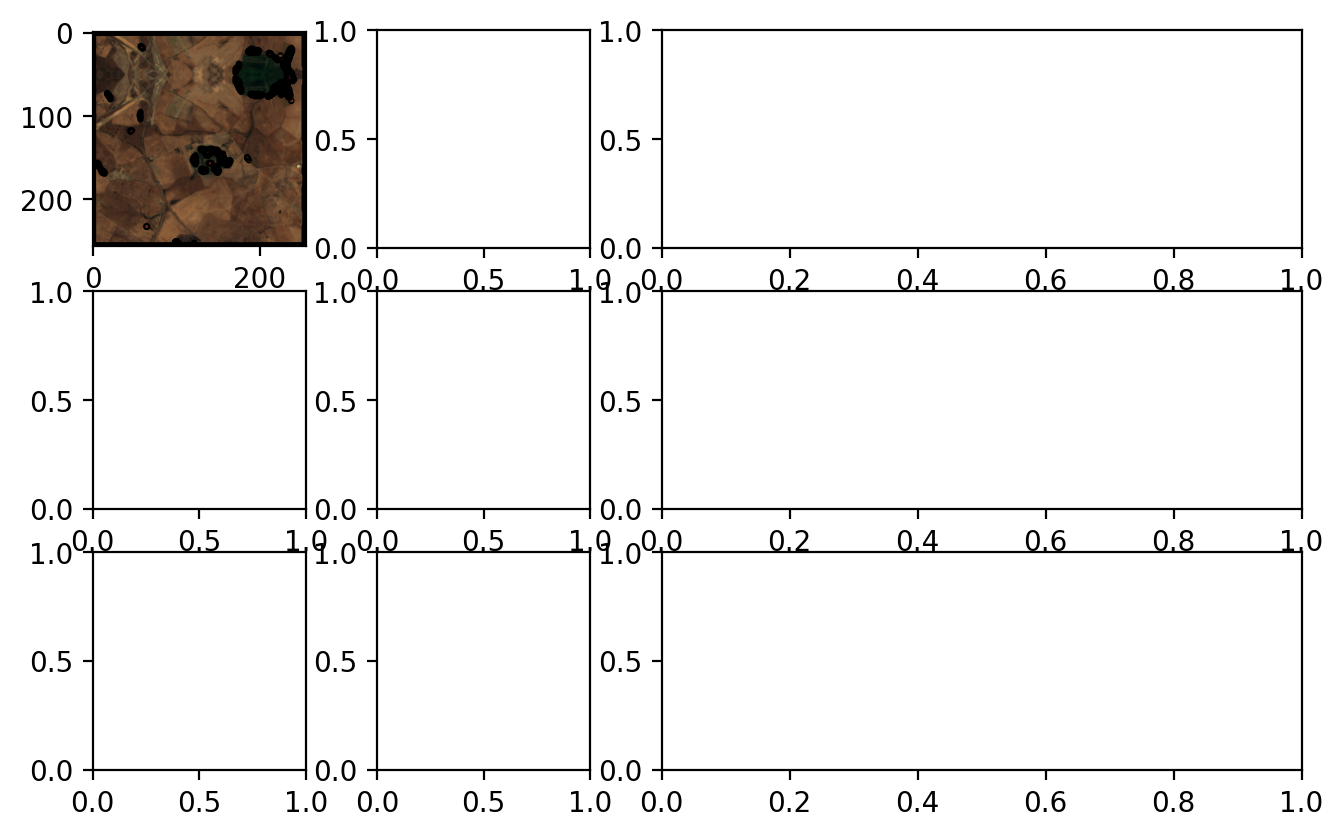

In [ ]:
# Setting up main parameters
model_name = "unet"
output_dir = "../output/crp/unet_fire_DLR"
class_id = 0
n_concepts = 3
n_refimgs = 12
layer = "encoder.layer3.0.conv3"
mode = "relevance"
prediction_num = 0


test_image_directories = [
    # dlr_germany_image1,
    # dlr_germany_image2,
    dlr_sardinia_image1,
    dlr_sardinia_image2,
    dlr_sardinia_image3,
    dlr_kuhmo_image1,
    dlr_kuhmo_image2
    ]

for img_dir in test_image_directories:
    print(f"Processing {img_dir}")

    test_image_dataset = DatasetDLR(
        img_dir=img_dir,
        mask_dir=None,
        normalize_means_stds=[
            [0.1161, 0.1065, 0.1036, 0.2059],  # Means
            [0.0556, 0.0570, 0.0772, 0.1033]   # Stds
        ]
    )

    xai_results_dir = os.path.join(img_dir, "xai_results")
    layer_str = layer.replace(".", "_")
    layer_results_dir = os.path.join(xai_results_dir, layer_str)

    os.makedirs(layer_results_dir, exist_ok=True)


    for sample_id in tqdm(range(len(test_image_dataset))):
        test_img, test_mask = test_image_dataset[sample_id]

        # Save source image
        normalized_img = np.array(test_img.cpu().numpy())  # Assuming test_img is a tensor
        normalized_img = np.transpose(normalized_img[:3, :, :], (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        normalized_img = ((normalized_img - normalized_img.min()) / (normalized_img.max() - normalized_img.min()) * 255).astype(np.uint8)
        
        # Save the properly normalized image
        plt.imsave(os.path.join(layer_results_dir, f"sample_{sample_id}_src.png"), normalized_img)

        fig = plot_one_image_explanation(model_name, model, test_img, reference_dataset, class_id, layer, prediction_num, mode, n_concepts, n_refimgs, output_dir=output_dir)

        fig.savefig(os.path.join(layer_results_dir, f"sample_{sample_id}.png"))

        plt.close(fig)


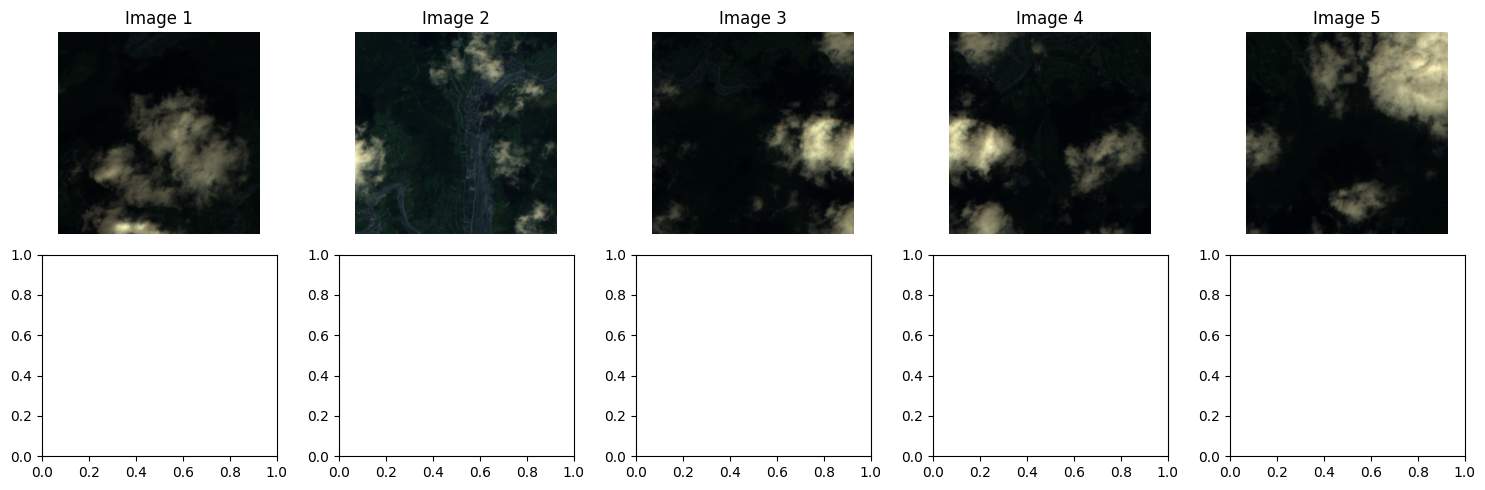

In [36]:
# Visualize 5 images and their masks
num_images = 5
idx_start = 10
fig, axes = plt.subplots(2, num_images, figsize=(15, 5))  # 2 rows (Images, Masks)

for i in range(num_images):
    image, _ = test_image_dataset[i + idx_start]  # Get image-mask pair
    image = np.array(((image - image.min()) / (image.max() - image.min()) * 255)).astype(np.uint8)
    image = np.transpose(image[:3, :, :], (1, 2, 0))  # Convert to (H, W, C)
    # mask = mask.squeeze() # Remove channel dim

    # Top row: Images
    axes[0, i].imshow(image)
    axes[0, i].set_title(f"Image {i+1}")
    axes[0, i].axis("off")

    # Bottom row: Masks
    # axes[1, i].imshow(mask, cmap="gray")
    # axes[1, i].set_title(f"Mask {i+1}")
    # axes[1, i].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

# print(f"Dataset size: {len(dataset)}")